In [141]:
import pandas as pd
from pickle import dump, load
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import pickle
from sklearn.model_selection import ParameterGrid

In [142]:
y_train = pd.read_csv("/workspaces/EDA_5_alfonso/data/processed/diabetes_y_train.csv")
y_test = pd.read_csv("/workspaces/EDA_5_alfonso/data/processed/diabetes_y_test.csv")
X_train = pd.read_csv("/workspaces/EDA_5_alfonso/data/processed/diabetes_X_train.csv")
X_test = pd.read_csv("/workspaces/EDA_5_alfonso/data/processed/diabetes_X_test.csv")

In [143]:
accs = []
percents = [1, 0.8, 0.7, 0.6, 0.5,0.3, 0.2]
for p in percents:
    selection_model = SelectKBest(f_classif, k = int(len(X_train.columns) * p))
    selection_model.fit(X_train, y_train)

    ix = selection_model.get_support()
    train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])

    dump(selection_model, open(f"/workspaces/EDA_5_alfonso/models/selection_model{p}.pk", "wb"))
    # Definir el clasificador de árbol de decisión
    model = DecisionTreeClassifier(random_state=24)
    model.fit(train_sel, y_train)
    y_pred = model.predict(train_sel)
    acc = accuracy_score(y_train, y_pred)
    accs.append(acc)



best_acc = accs.index(max(accs)) 
print(f'The best k for selection is {percents[best_acc]}.')
print(f'The best accuracy we get is {round(accs[best_acc],4)}.')
print(accs)

The best k for selection is 1.
The best accuracy we get is 1.0.
[1.0, 1.0, 1.0, 1.0, 1.0, 0.990228013029316, 0.7801302931596091]


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [144]:
y_train

,Outcome
0,1
1,0
2,0
3,0
4,1
...,...
609,0
610,0
611,0
612,0


In [145]:
y_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [146]:
selection_model = pickle.load(open("/workspaces/EDA_5_alfonso/models/selection_model0.2.pk", "rb"))
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])
model = DecisionTreeClassifier(random_state=24)
model.fit(X_train_sel, y_train)
y_pred = model.predict(X_train_sel)
acc = accuracy_score(y_train, y_pred)
acc

0.7801302931596091

In [147]:
# Definir los parámetros que quieres ajustar
hyperparameters = {
    'criterion': ["gini", "entropy", "log_loss"],
    'max_depth': [1, 4, 10, 25, None],  # Reducido el rango
    'min_samples_split': [2, 5, 8, 20],  # Ajustado el rango
    'min_samples_leaf': [1, 2, 3, 10],  # Ajustado el rango
    'max_leaf_nodes': [None, 5, 10, 15],  # Ajustado el rango
    # 'max_features': ['sqrt', None, 'log2'],
    'random_state': [24]
}



In [148]:
accs = []
for combination in ParameterGrid(hyperparameters):
    model = DecisionTreeClassifier(**combination)
    model.fit(X_train_sel, y_train)
    y_pred = model.predict(X_train_sel)
    accs.append(accuracy_score(y_train, y_pred))

best_acc = max(accs)
best_combination = list(ParameterGrid(hyperparameters))[accs.index(best_acc)]
best_model = DecisionTreeClassifier(**best_combination)
best_model.fit(X_train_sel, y_train)
y_pred = best_model.predict(X_train_sel)
accuracy_score(y_train, y_pred)

0.7801302931596091

In [149]:
y_pred = best_model.predict(X_test_sel)
accuracy_score(y_test, y_pred)

0.7077922077922078

In [150]:
tree_classifier = DecisionTreeClassifier(random_state = 24)

grid = GridSearchCV(tree_classifier, hyperparameters, scoring = 'accuracy')
grid

GridSearchCV(estimator=DecisionTreeClassifier(random_state=24),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 4, 10, 25, None],
                         'max_leaf_nodes': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 3, 10],
                         'min_samples_split': [2, 5, 8, 20],
                         'random_state': [24]},
             scoring='accuracy')

In [151]:
grid.fit(X_train_sel, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=24),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 4, 10, 25, None],
                         'max_leaf_nodes': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 3, 10],
                         'min_samples_split': [2, 5, 8, 20],
                         'random_state': [24]},
             scoring='accuracy')

In [152]:
best_hyper = grid.best_params_ 

In [153]:
# best_model = DecisionTreeClassifier(criterion='gini', max_depth = 25, max_leaf_nodes = None, min_samples_leaf = 10, min_samples_split = 2, random_state = 24)
best_model = DecisionTreeClassifier(** best_hyper)
best_model.fit(X_train_sel, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=24)

In [154]:
y_pred = best_model.predict(X_train_sel)
accuracy_score(y_train, y_pred)

0.750814332247557

In [155]:
y_pred = best_model.predict(X_test_sel)
accuracy_score(y_test, y_pred)

0.7467532467532467

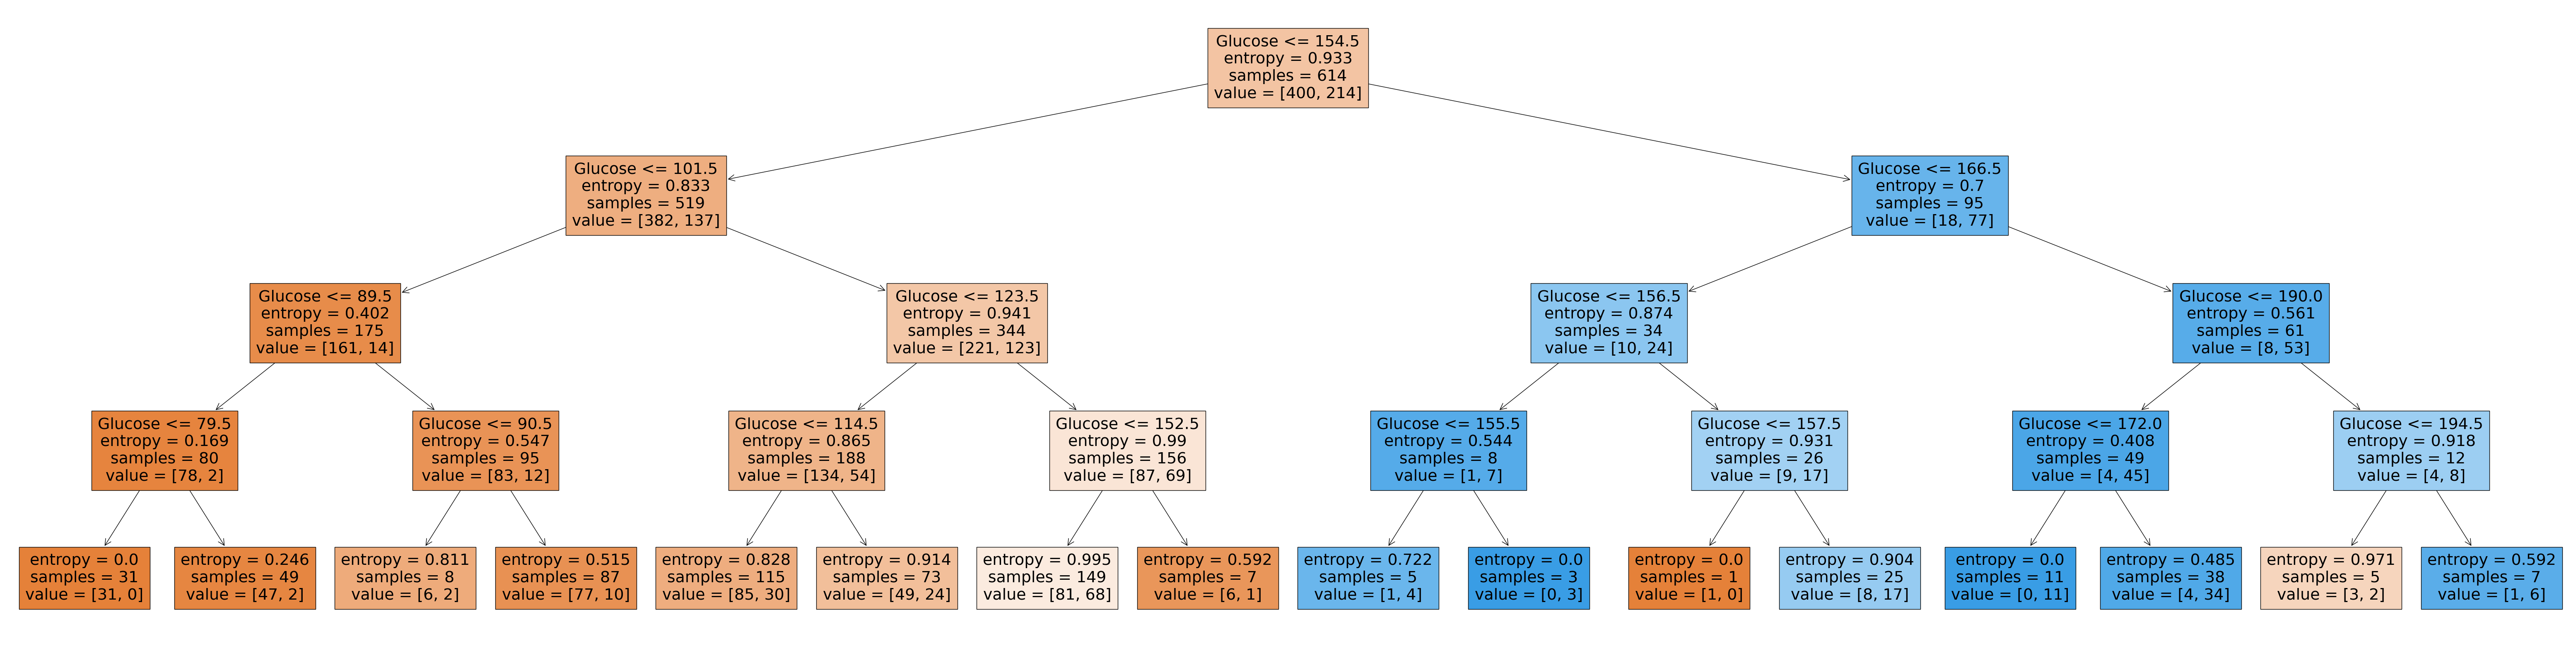

In [156]:
plt.figure(figsize =(80,20))

plot_tree(best_model, feature_names=X_train_sel.columns, max_depth=None, filled=True);
# Guardar la figura como un archivo PNG en el directorio deseado
output_file_path = "/workspaces/EDA_5_alfonso/assets/plot_trees.png"
plt.savefig(output_file_path)

plt.show()
